In [43]:
# importing necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlb

In [2]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [3]:
raw_eqk.shape

#has 120108 rows and 8 columns

(120108, 8)

In [5]:
eqk = raw_eqk.loc[(raw_eqk['type'] == 'earthquake') & (raw_eqk['mag'] >= 6.5)]

In [7]:
eqk.shape

(54, 8)

In [8]:
eqk = gpd.GeoDataFrame(eqk,geometry = gpd.points_from_xy(eqk.longitude, eqk.latitude) ,crs = 'EPSG:4326')

In [17]:
type(eqk)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

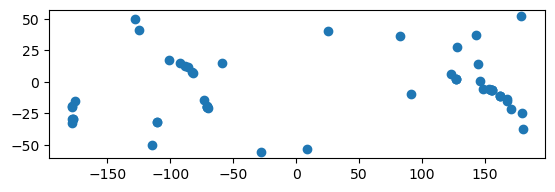

In [22]:
eqk.plot()

In [24]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

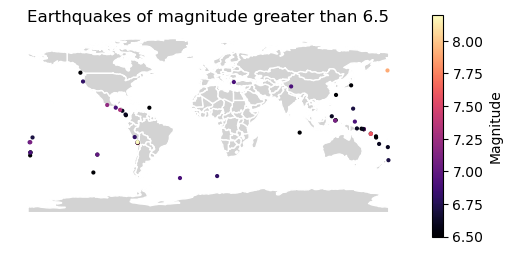

In [56]:
fig, ax = plt.subplots()
worldmap.plot(ax = ax,
             color = 'lightgray',
             edgecolor = 'white')
eqk.plot(ax = ax,
        markersize = 4,
         column = 'mag',
         legend = True,
         legend_kwds = {'shrink': .6,
                       'label' : 'Magnitude'},
        cmap = 'magma')
ax.set_title('Earthquakes of magnitude greater than 6.5')
ax.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()